In [3]:
import pandas as pd
data = pd.read_csv("/home/abhinav/akki/Diabetes-Prediction-Using-ML-Classifiers/diabetes.csv")

In [4]:
data.shape

(768, 9)

In [5]:
data.head(n=6)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0

In [6]:


data = pd.DataFrame({'F1':data.iloc[:,:8].values[:,0],
                     'F2':data.iloc[:,:8].values[:,1],
                     'F3':data.iloc[:,:8].values[:,2],
                     'F4':data.iloc[:,:8].values[:,3],
                     'F5':data.iloc[:,:8].values[:,4],
                     'F6':data.iloc[:,:8].values[:,5],
                     'F7':data.iloc[:,:8].values[:,6],
                     'F8':data.iloc[:,:8].values[:,7],
                     'Outcome':data.iloc[:,8:].values[:,0]})



In [7]:
data.describe()

F1          F2          F3          F4          F5          F6  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

               F7          F8     Outcome  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [9]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set(style="whitegrid")
import warnings 
from sklearn.svm import SVC, NuSVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
# from tflearn.data_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

2023-06-24 09:33:59.008006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 09:33:59.109313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 09:33:59.110099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 09:33:59.865222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [42]:
Renamed_feature= []               #list of names that will rename to feature column
all_clf_res=[]                    #every classifier auc values are stored in it
random_initializer=20            #random initializer
n_dots=50
##########################################################

for i in range(8):
  #for renaming dataset of columns features F1 -- F8 
  Renamed_feature.append('F'+str(i+1)) 
############################################################

# Pairs plots are just showing all variables paired with all the other variables
def pair_plot(data):
  '''
  This function will create a grid of Axes such that each variable
  in data will by shared in the y-axis across a single row and in the x-axis
  across a single column.The diagonal Axes are treated differently, drawing 
  a plot to show the univariate distribution of the data for the variable in
  that column.
  Parameters :
  Input - data is the pandas type variable for 
  plotting pair plot of features in this
  dataframe 
  
  Output :
  This function Plot pairwise relationships in a dataset.
  
  '''
  plt.figure()
  
  pair_plot =sns.pairplot(data=data,            
                          height=3,
                          hue='Outcome',  
                          diag_kind='kde')
  # fig.suptitle("Pairplot of all features")
  pair_plot.fig.suptitle("Pairplot of all features")
  plt.show()




###################################################################
# this function for Gaussian distribution plot 
# and box plot simultaneously in a figure
def Box_Gaussian(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The Gaussian distribution plot for
  eight feature of input data 

  '''
  
  fig=plt.figure(figsize=(15,6))                                #define figure size
  fig.suptitle("Box Gaussian plot of all features")
  
  n_scaler = preprocessing.StandardScaler()                 #standardization function
  temp_Data = n_scaler.fit_transform(data)                  #pass into function for standrd.
  for i in range(8):                                        #loop for all 8 feature 
    
    plt.subplot(2, 4, i+1)                                  #subplot for 2 rows in 4 columns
    Data = temp_Data[:,i]                                   #data for every feature
    sns.kdeplot(Data, shade=True,color='red', alpha=0.3)    #kernel density function under red shaded arae
    ax = sns.boxplot(Data, saturation=0.9, color="green")   #boxplot  with green shaded area
                                                            # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
                                                            # https://seaborn.pydata.org/generated/seaborn.boxplot.html
    plt.gca().invert_yaxis()                                #Reverse Y-Axis in PyPlot
    # plt.title('F'+str(i+1))
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])                    #removing xlabel data 
    plt.ylim((-0.5,0.65))                                   #y axis  limit
    plt.tight_layout()                                      #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
                                                            # https://matplotlib.org/api/tight_layout_api.html
    # plt.grid('on')
    
    for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()                     #Get the facecolor of the Axes.
      patch.set_facecolor((r, g, b, 0.3))                    #set colour intensity
#############################################################


def plot_confusionMatrix(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output -visualization of correalation matrix of
  input data 

  '''
  sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
  ax = plt.figure(figsize=(10, 8))                            #set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
  plt.title("Confusion Matrix of all features")
  sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell. 
              linecolor="black")                              #Color of the lines that will divide each cell.            
                                                              #https://seaborn.pydata.org/generated/seaborn.heatmap.html
  b, t = plt.ylim()                                           # discover the values for bottom and top
  b += 0.5                                                    # Add 0.5 to the bottom
  t -= 0.5                                                    # Subtract 0.5 from the top
  plt.ylim(b, t)                                              # update the ylim(bottom, top) values
  plt.show() 



############################################################
# this function plot univariate distribution of 
# every feature

def dist_Plot(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The distribution plot for
  eight feature of input data 

  '''
  fig, ax = plt.subplots(2,4, figsize=(12,5))                 #set numbers of rows and columns of subplot
  sns.set()
  sns.distplot(data.F1, bins = 10, ax=ax[0,0])                #Flexibly plot a univariate distribution of observations.
  sns.distplot(data.F2, bins = 10, ax=ax[0,1]) 
  sns.distplot(data.F3, bins = 10, ax=ax[0,2]) 
  sns.distplot(data.F4, bins = 10, ax=ax[0,3])
  sns.distplot(data.F5, bins = 10, ax=ax[1,0]) 
  sns.distplot(data.F6, bins = 10, ax=ax[1,1]) 
  sns.distplot(data.F7, bins = 10, ax=ax[1,2]) 
  sns.distplot(data.F8, bins = 10, ax=ax[1,3]) 
  fig.suptitle("Gaussian Distribution of all features")
  fig.tight_layout()                                          #This module provides routines to adjust subplot params
                                                              #  so that subplots are nicely fit in the figure.
                                                        

############################################################
# this function plot violin plot  of 
# every feature


def plot_violinplot (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The violinplot plot for
  eight feature of input data 

  '''

  # A violin plot is a method of plotting numeric data.
  # It is similar to box plot with a rotated kernel 
  # density plot on each side. Violin plots are similar
  # to box plots, except that they also show the probability
  # density of the data at different values (in the simplest
  # case this could be a histogram).
  fig, ax = plt.subplots(2,4, figsize=(12,6))          
  # #set numbers of rows and columns of subplot and figure size 
  sns.set()
  sns.violinplot(x = data.Outcome, y=data.F1,  ax=ax[0,0])    #violine plot for F1 feature
  sns.violinplot(x = data.Outcome, y=data.F2,  ax=ax[0,1])    #violine plot for F2 feature 
  sns.violinplot(x = data.Outcome, y=data.F3,  ax=ax[0,2])    #violine plot for F3 feature 
  sns.violinplot(x = data.Outcome, y=data.F4,  ax=ax[0,3])    #violine plot for F4 feature
  sns.violinplot(x = data.Outcome, y=data.F5,  ax=ax[1,0])    #violine plot for F5 feature 
  sns.violinplot(x = data.Outcome, y=data.F6,  ax=ax[1,1])    #violine plot for F6 feature 
  sns.violinplot(x = data.Outcome, y=data.F7,  ax=ax[1,2])    #violine plot for F7 feature 
  sns.violinplot(x = data.Outcome, y=data.F8,  ax=ax[1,3])    #violine plot for F8 feature 
  fig.suptitle("Violin plot of all features")
  fig.tight_layout()

                                                              # https://seaborn.pydata.org/generated/seaborn.violinplot.html

############################################################


#this function  is for manual outleir rejection
def Manual (data):

    '''
    Parameters :
    Input - data is the pandas type variable

    Return - dataframe with outleir rejection
    of input data 

    '''
    # input dataset is data 
    max_Pregnancies = data.F1.max()                         #maximum feature of F1
    data = data[data.F1!=max_Pregnancies]                   #find  where extreme value is absent and remove extreme
    max_Glucose = data.F2.max()                             #maximum feature of F2  
    data = data[data.F2!=max_Glucose]                       #find  where extreme value is absent and remove
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element 
      min_Glucose = data.F2.min()                           #find minimum
      data = data[data.F2!=min_Glucose]                     #reject minimum
    max_BloodPressure = data.F3.max()                       #maximum feature of F3
    data = data[data.F3!=max_BloodPressure]                 #find  where extreme value is absent and remove
    for i in range(2):                                      #in this loop we succesively remove 2 extreme element  
      max_skinthickness = data.F4.max() 
      data = data[data.F4!=max_skinthickness]
    for i in range(25):                                     #in this loop we succesively remove 25 extreme element  
      max_Insulin = data.F5.max() 
      data = data[data.F5!=max_Insulin]
    max_bmi = data.F6.max()
    data = data[data.F6!=max_bmi]
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element  
      min_bmi = data.F6.min() 
      data = data[data.F6!=min_bmi]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element 
      max_DiabetesPedigreeF = data.F7.max()
      data = data[data.F7!=max_DiabetesPedigreeF]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element  
      max_age = data.F8.max() 
      data = data[data.F8!=max_age]
      df =data
    return data

############################################################

# this function if for outlair rejection with
# respect to mean value
def IQR_Mean (data):


  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with mean
  of input data 

  '''
  for i in range(8): 
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)                                   # Q1 is the "middle" value in the first half of the rank-ordered data set.
    Q3 = x.quantile(0.75)                                   # Q3 is the "middle" value in the second half of the rank-ordered data set.
    IQR = Q3-Q1                                             # The interquartile range is equal to Q3 minus Q1.
    mean = x.mean()                                         #mean of feature 
    for j in range(569):                                    # loop for first 569 elements of feature
      temp = x[j]                                           # every feature value
      LW = (Q1 - 1.5 * IQR)                                 #lower considerable range of gaussian distribution
      UW = (Q3 + 1.5 * IQR)                                 #upper considerable range of gaussian distribution
      if temp < LW:                                         #replace upper value with mean
        x[j] = mean
      if temp > UW:                                         #replace lower value with mean
        x[j] = mean
    data[Renamed_feature[i]] = x
  return data

############################################################
# this function if for outlair rejection with
# respect to median value same as previous function
def IQR_Median (data): 
  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with median
  of input data 

  '''
  for i in range(8):
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    median = x.quantile(0.5)                                # find the median
    for j in range(569):                                    #replace the first 569 values with respect to median
      temp = x[j]
      LW = (Q1 - 1.5 * IQR)
      UW = (Q3 + 1.5 * IQR)
      if temp < LW:                                         #replace upper value with median
        x[j] = median
      if temp > UW:
        x[j] = median                                       #replace upper value with median
    data[Renamed_feature[i]] = x
  return data

############################################################



# this function if for outlair rejection with
# 1.5 times of IQR that means that are
# significant in gaussian distribution
def IQR (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  of input data 

  '''
  #input dataset as data
  for i in range(8):                                        # for every feature
    Q1 = data[Renamed_feature[i]].quantile(0.25)
    Q3 = data[Renamed_feature[i]].quantile(0.75)
    IQR = Q3-Q1                                             #find IQR
    LW = (Q1 - 1.5 * IQR)                                   #find lower boundary
          # print(LW)
    UW = (Q3 + 1.5 * IQR)                                   #find upper boundary
          # print(UW)
    data = data[data[Renamed_feature[i]]<UW]                #drop greater than upper limit
    data = data[data[Renamed_feature[i]]>LW]                #drop smaller than lower limit

  return data


############################################################
#outlier rejection with different condition

def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
  '''
  Parameters :
  Input - 
  data is the pandas type variable
  iqr_Mean - for outleir rejection with Mean
  iqr_Medain- for outleir rejection with Medain
  iqr- for drop the outleir 
  manual -for manual rejection 
  Return - dataframe with outleir rejection
  filled with Input parameter

  '''
  
  # outlier_Rejection with conditional input
  if iqr_Mean == True:                                     #reject outleir with Mean
    data = IQR_Mean (data)
  if iqr_Medain == True:                                   #reject outleir with Median
    data = IQR_Medain (data)
  if iqr == True:                                          #reject outleir in IQR range
    data = IQR (data)
  if manual == True:                                       #reject outleir with manual
    data = Manual (data)

  return data

############################################################

#data plot on different input condition 
def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):
  
  '''
  Parameters :
  Input - 
  data - It is the pandas type variable
  Pair_plot - for pair plot visualization of input  data  
  Dist_Plot- for gaussian distribution plot visualization of input  data  
  Plot_violinplot- for violin plot visualization of input  data  
  Plot_confusionMatrix -for confusion matrix visualization of input  data   
  
  Output - dataframe with outleir rejection
  filled with Input parameter

  '''
  if Pair_plot ==True:
    pair_plot(data)

  if Dist_Plot ==True:
    dist_Plot(data)

  if Plot_violinplot ==True:
    plot_violinplot (data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(data)

  if box_Gaussian ==True:
    Box_Gaussian(data)


############################################################


def replace_zero(data, field, target):
    
    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]


############################################################


def metrics (y_true, y_pred, probas_):


  '''
  Parameters :
  Input - 
  y_true - true  value of input data    
  y_pred- predicted  value of input data  
  probas_- probability/confidence of predicted output

  return -True Negative(tn),False Positive(fp),False Negative(fn)
  True positive(tp),AUC(roc_auc),False Positive Rate(fpr),
  True positive rate(tpr)

  '''


  points=n_dots*'-'
  print(points)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  #  aucs.append(roc_auc)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr

############################################################


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):

  '''
  Parameters :
  mean_fpr - Mean False positive rate
  tprs -values of true positive rate
  aucs  - values of auc
  TP    - True positive 
  TN    - True Negative
  FP    - False Positiv
  FN    - False Negative

  Output - 
  Visalization of TPR vs FPR plot
  '''
  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  # mean_auc = auc(mean_fpr, mean_tpr)
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  # plt.figure(figsize=(8, 5))
  # plt.grid(True)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  # Setting the background color
  ax.set_facecolor("white")
  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  # plt.grid(True)
  plt.show()
   
############################################################

def plot_Current_ROC(fpr,tpr,iterator,roc_auc):
  
  '''
  Parameters :
  Input - 
  fpr - False positive rate
  tpr - True positive rate
  roc_auc -auc values of roc curve

  Output - 
  Visalization of current roc curve

  '''
  plt.plot(fpr,
          
          tpr,
          # Color[iterator],
          alpha=0.35,
          # label='macro-average ROC (AUC = {0:0.3f})'.format(roc_auc)
          # +FOLD[iterator],
          linewidth=1)
   
############################################################

   
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  '''
  Parameters :
  Input - 
  X_Train -train data 
  Y_Train - label/output of train data
  tuned_parameters =parameters of models
  verbose = condition about model

  Output - 
  Returned a tuned classifier using grid search
  '''
  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf
############################################################

def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  '''
  Parameters :
  Input - 
  aucs= values of aucs
  Accuracy - value of accuracy
  TP  - True Positive
  TN  - True Negative
  FP  - False Positive
  FN  - False Negative


  Output - 
  It prints the average aucs,accuarcy,confusion matrix
  '''

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)
    
############################################################

#this  function is for algorithm based feature selection 
def feature_Selector(data, algo, n_feature):
    '''
    Parameters :
    Input - 
    data - It is the pandas type variable
    algo - type of algorith PCA,ICA,Correlation


    Output - 
    It prints the average aucs,accuarcy,confusion matrix
    '''
    if algo=='PCA':                                                   #for pca algorithm
        X_Data= data.iloc[:,:8].values
        pca = PCA(n_components=n_feature)                             #number of feature
        X_Data = pca.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values

    if algo == 'ICA':
        X_Data= data.iloc[:,:8].values
        ICA = FastICA(n_components=n_feature, random_state=12) 
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values
    
    if algo =='corr':                                                   #for ica algorithm
        if n_feature ==4:
            data = data[['F2','F5','F4','F6','Outcome']]                #for 4 feature
            return data.iloc[:,:4].values, data.iloc[:,4:].values
        if n_feature ==6:
            data = data[['F1','F2','F4','F5','F6','F8','Outcome']]       #for 6 feature
            return data.iloc[:,:6].values, data.iloc[:,6:].values
        if n_feature ==8:
            data = data[['F1','F2','F3','F4','F5','F6','F7','F8','Outcome']]       #for 6 feature
            return data.iloc[:,:8].values, data.iloc[:,8:].values
    if algo == 'None':
        return data.iloc[:,:8].values, data.iloc[:,8:].values      

In [11]:
def Ensembler(n_model, X_Train, Y_Train, X_Test, Y_Test, weight):
    
    '''
    Parameters :
    Input - 
    n_model =Number of models we need to ensemble
    X_Train =train data
    Y_Train =train data label
    X_Test =test data 
    Y_Test =test data label
    weight =weight methods of models when ensembling


    Return - 
    Returned a tuned ensembelled classifier using grid search

    '''

                                                                      ###### define the hyper parameters(number of neighbor,leaf_size,Distance) of KNN
    n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    leaf_size = [5,10,15,20,25,30,35,40,45,50]
    Distance = [1,2]
                                                                      #define parameters with different algorithm
    tuned_parameters_knn = [ {'n_neighbors': n_neighbors, 
                        'algorithm' : ['brute'],
                        'p':Distance},
                         
                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},
                          
                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]

    clf_knn = creat_Model (classifier = KNeighborsClassifier(),       #create knn with utility function          
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_knn,
                      verbose=0)
    
    tuned_parameters_ab = { 'algorithm': ['SAMME','SAMME.R'],         # define parameters of adaboost
                   'learning_rate':[0.1,0.5,1.0],
                   'n_estimators': [10,50,100,200]}

    clf_ab = creat_Model (classifier = AdaBoostClassifier(random_state=random_initializer),
                  X_Train = X_Train,                                 #create model with AdaBoost classifier with utility function             
                  Y_Train = Y_Train,
                  tuned_parameters = tuned_parameters_ab,
                  verbose=0)
    
    tuned_parameters_dt = {'criterion': ['gini','entropy'],          # define parameters of DecisionTree
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }

    clf_dt = creat_Model (classifier = DecisionTreeClassifier(random_state=random_initializer),
                      X_Train = X_Train,                             #create model with DecisionTree classifier with utility function 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_dt,
                      verbose=0)
    
    tuned_parameters_rf = {'criterion': ['gini','entropy']}          # define parameters of RandomForestClassifier

    clf_rf = creat_Model (classifier = RandomForestClassifier(random_state=random_initializer),
                      X_Train = X_Train,                             #create model with RandomForest  classifier with utility function 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_rf,
                      verbose=0)
    
    var_smoothing = [1e-01,
                    1e-02,
                    1e-03,
                    1e-04,
                    1e-05,
                    1e-06,
                    1e-07,
                    1e-08,
                    1e-09,
                    1e-10,
                    1e-11,
                    1e-12]

    tuned_parameters_nb = [{'var_smoothing': var_smoothing}]         # define parameters of Naive Bais

    clf_nb = creat_Model (classifier = GaussianNB(),                 #create model with Naive Bais  classifier with utility function 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_nb,
                      verbose=0)
    tuned_parameters_xb = {                                          # define parameters of XGBClassifier
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

        
    clf_xb = creat_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'error',random_state=random_initializer),
                      X_Train = X_Train,                              #create model with XGB Classifier classifier with utility function
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_xb,
                      verbose=0)
    
    
    if weight == 'None':                                              #If weight is none we used soft voting 
        if n_model == 2:                                              #Using 2 best model we create ensembled model with soft voting
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model 
        if n_model == 3:                                               #Using 3 best model we create ensembled model with soft voting                              
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 4:                                               #Using 4 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 5:                                               #Using 5 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 6:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb),
                                      ('ab',clf_ab)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        
    if weight == 'accuracy':
        if n_model == 2:                                               #Using 6 best model we create ensembled model with soft voting   
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_ab.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model 
        if n_model == 3:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_knn.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 4:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_ab.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_rf.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 5:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_knn.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_rf.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_nb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 6:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb),
                                      ('ab',clf_ab)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_knn.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_rf.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_nb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_ab.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
         
    
    if weight == 'auc':
        if n_model == 2:                                               #Using 2 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_ab.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model 
        if n_model == 3:                                               #Using 3 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_knn.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 4:                                               #Using 4 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_ab.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_rf.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 5:                                               #Using 5 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_knn.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_rf.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_nb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 6:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb),
                                      ('ab',clf_ab)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_knn.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_rf.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_nb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_ab.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model

<Figure size 640x480 with 0 Axes>

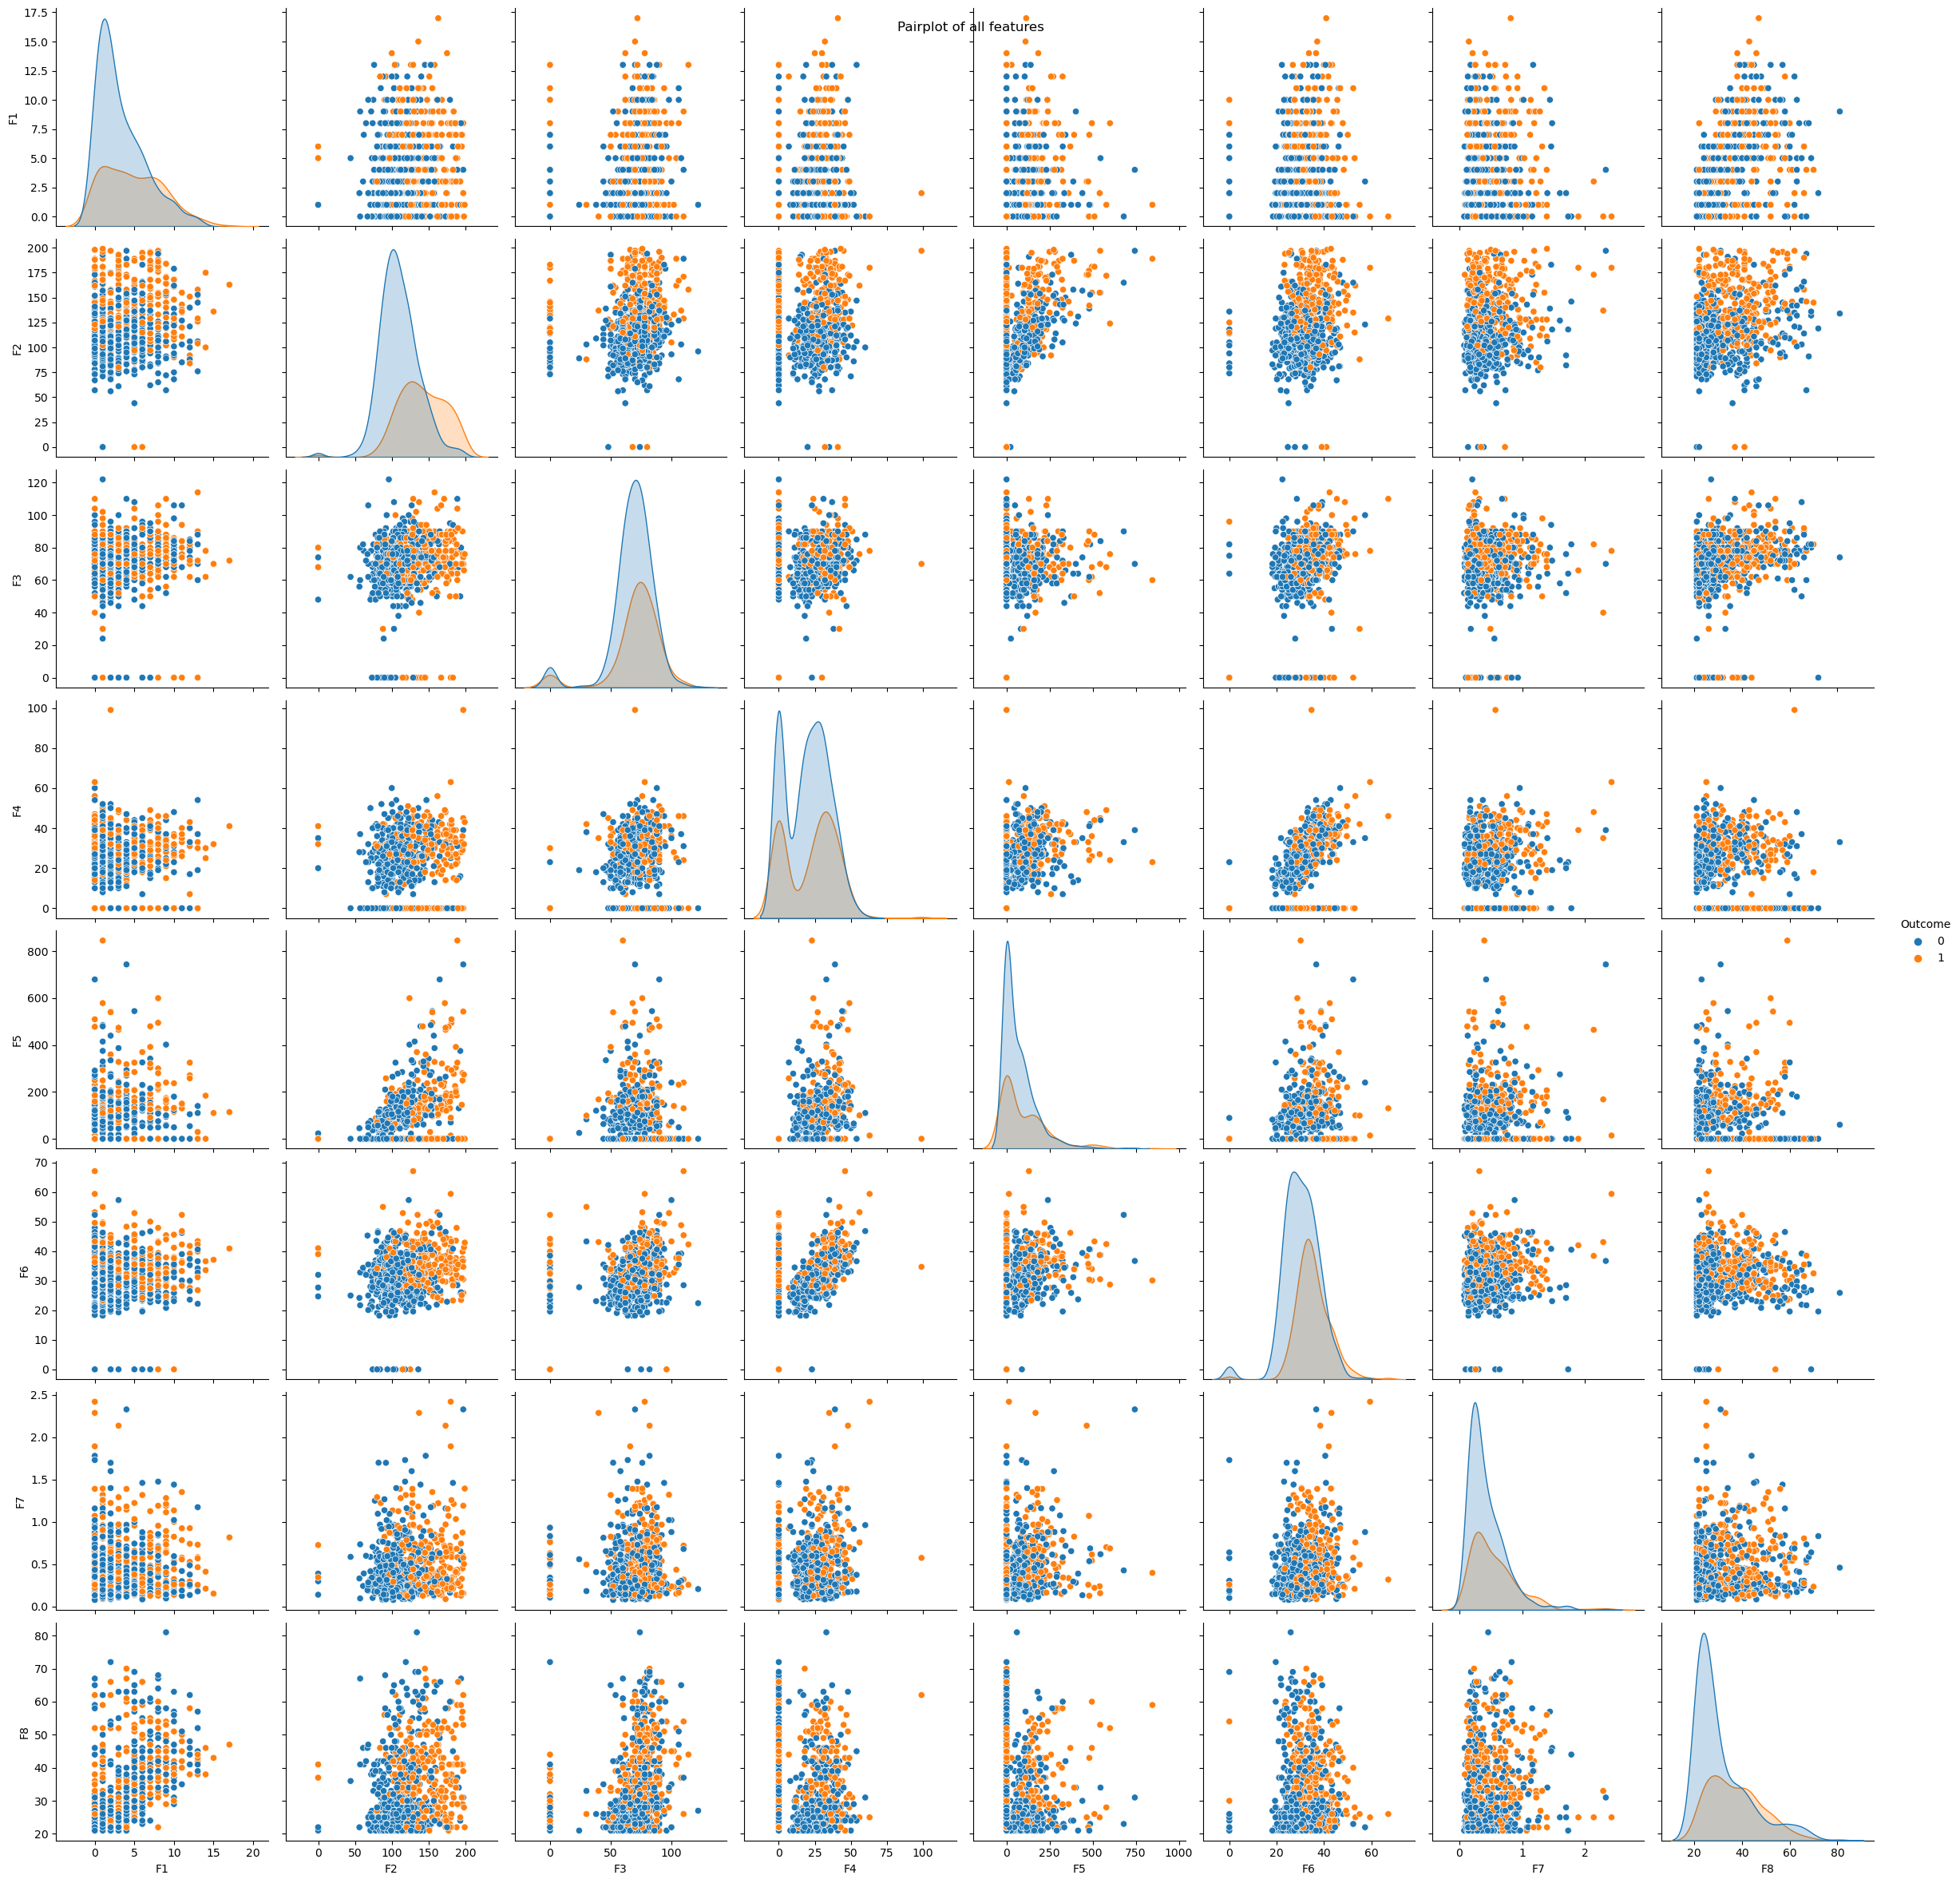

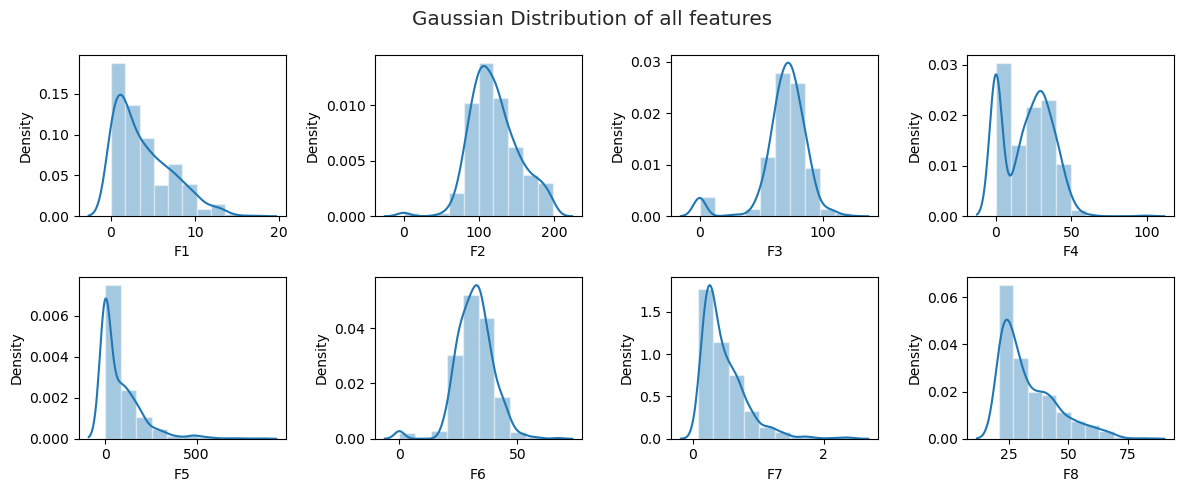

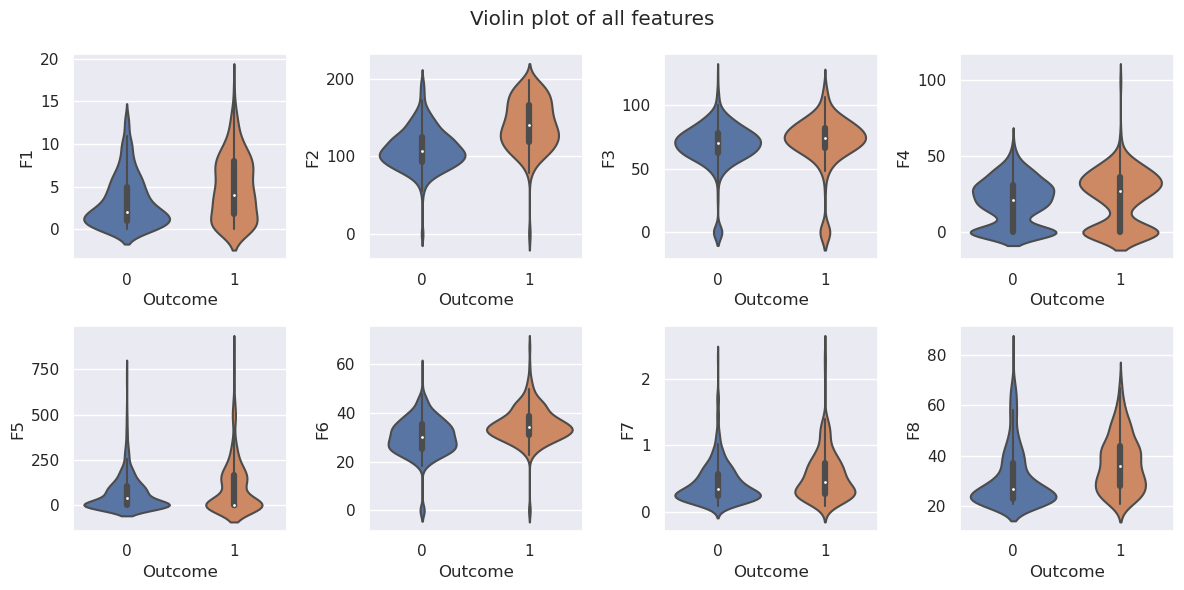

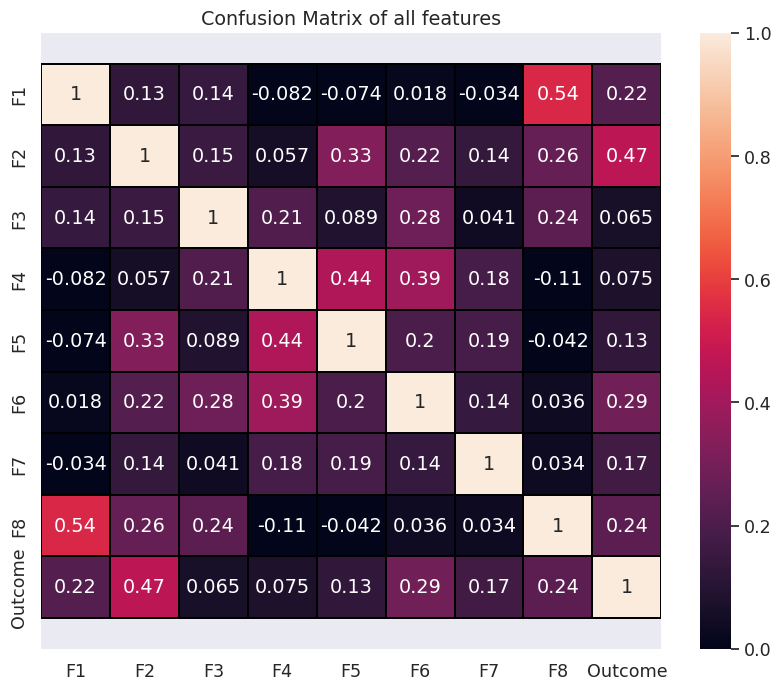

In [13]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

In [43]:
print('Shape Before Process: ' + str(data.shape))

# The process for the outlier rejection (P)
data = outlier_Rejection (data,
                  iqr_Mean=False,
                  iqr_Medain=False,
                  iqr=True,
                  manual=False)
print('Shape After outlier Removed: ' + str(data.shape))

# The process for the filling missing values (Q)
for col in ['F2', 'F3', 'F4', 'F5', 'F6']:   
    replace_zero(data, col, 'Outcome')              
print('Shape After Filling Missing Value: ' + str(data.shape))
     
                        
X_Data,Y_Lavel = feature_Selector(data, algo='corr', n_feature=8)    
print('Shape After Feature Selection: ' + str(X_Data.shape))


# scaler =  preprocessing.StandardScaler()
# X_Data,Y_Lavel= scaler.fit_transform(X_Data), Y_Lavel
# print('Shape After Standardization: ' + str(X_Data.shape))          

kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=random_initializer)

Shape Before Process: (489, 9)
Shape After outlier Removed: (464, 9)
Shape After Filling Missing Value: (464, 9)
Shape After Feature Selection: (464, 8)


In [44]:
len(X_Data[0])

8

In [47]:
X_Data[0][3]

35.0

In [48]:
X_Data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [41]:
data

F1     F2    F3         F4          F5    F6     F7    F8  Outcome
0    6.0  148.0  72.0  35.000000  171.474227  33.6  0.627  50.0        1
1    1.0   85.0  66.0  29.000000  113.606695  26.6  0.351  31.0        0
3    1.0   89.0  66.0  23.000000   94.000000  28.1  0.167  21.0        0
5    5.0  116.0  74.0  27.094512  113.606695  25.6  0.201  30.0        0
6    3.0   78.0  50.0  32.000000   88.000000  31.0  0.248  26.0        1
..   ...    ...   ...        ...         ...   ...    ...   ...      ...
762  9.0   89.0  62.0  27.094512  113.606695  22.5  0.142  33.0        0
764  2.0  122.0  70.0  27.000000  113.606695  36.8  0.340  27.0        0
765  5.0  121.0  72.0  23.000000  112.000000  26.2  0.245  30.0        0
766  1.0  126.0  60.0  32.059259  171.474227  30.1  0.349  47.0        1
767  1.0   93.0  70.0  31.000000  113.606695  30.4  0.315  23.0        0

[489 rows x 9 columns]

<Figure size 640x480 with 0 Axes>

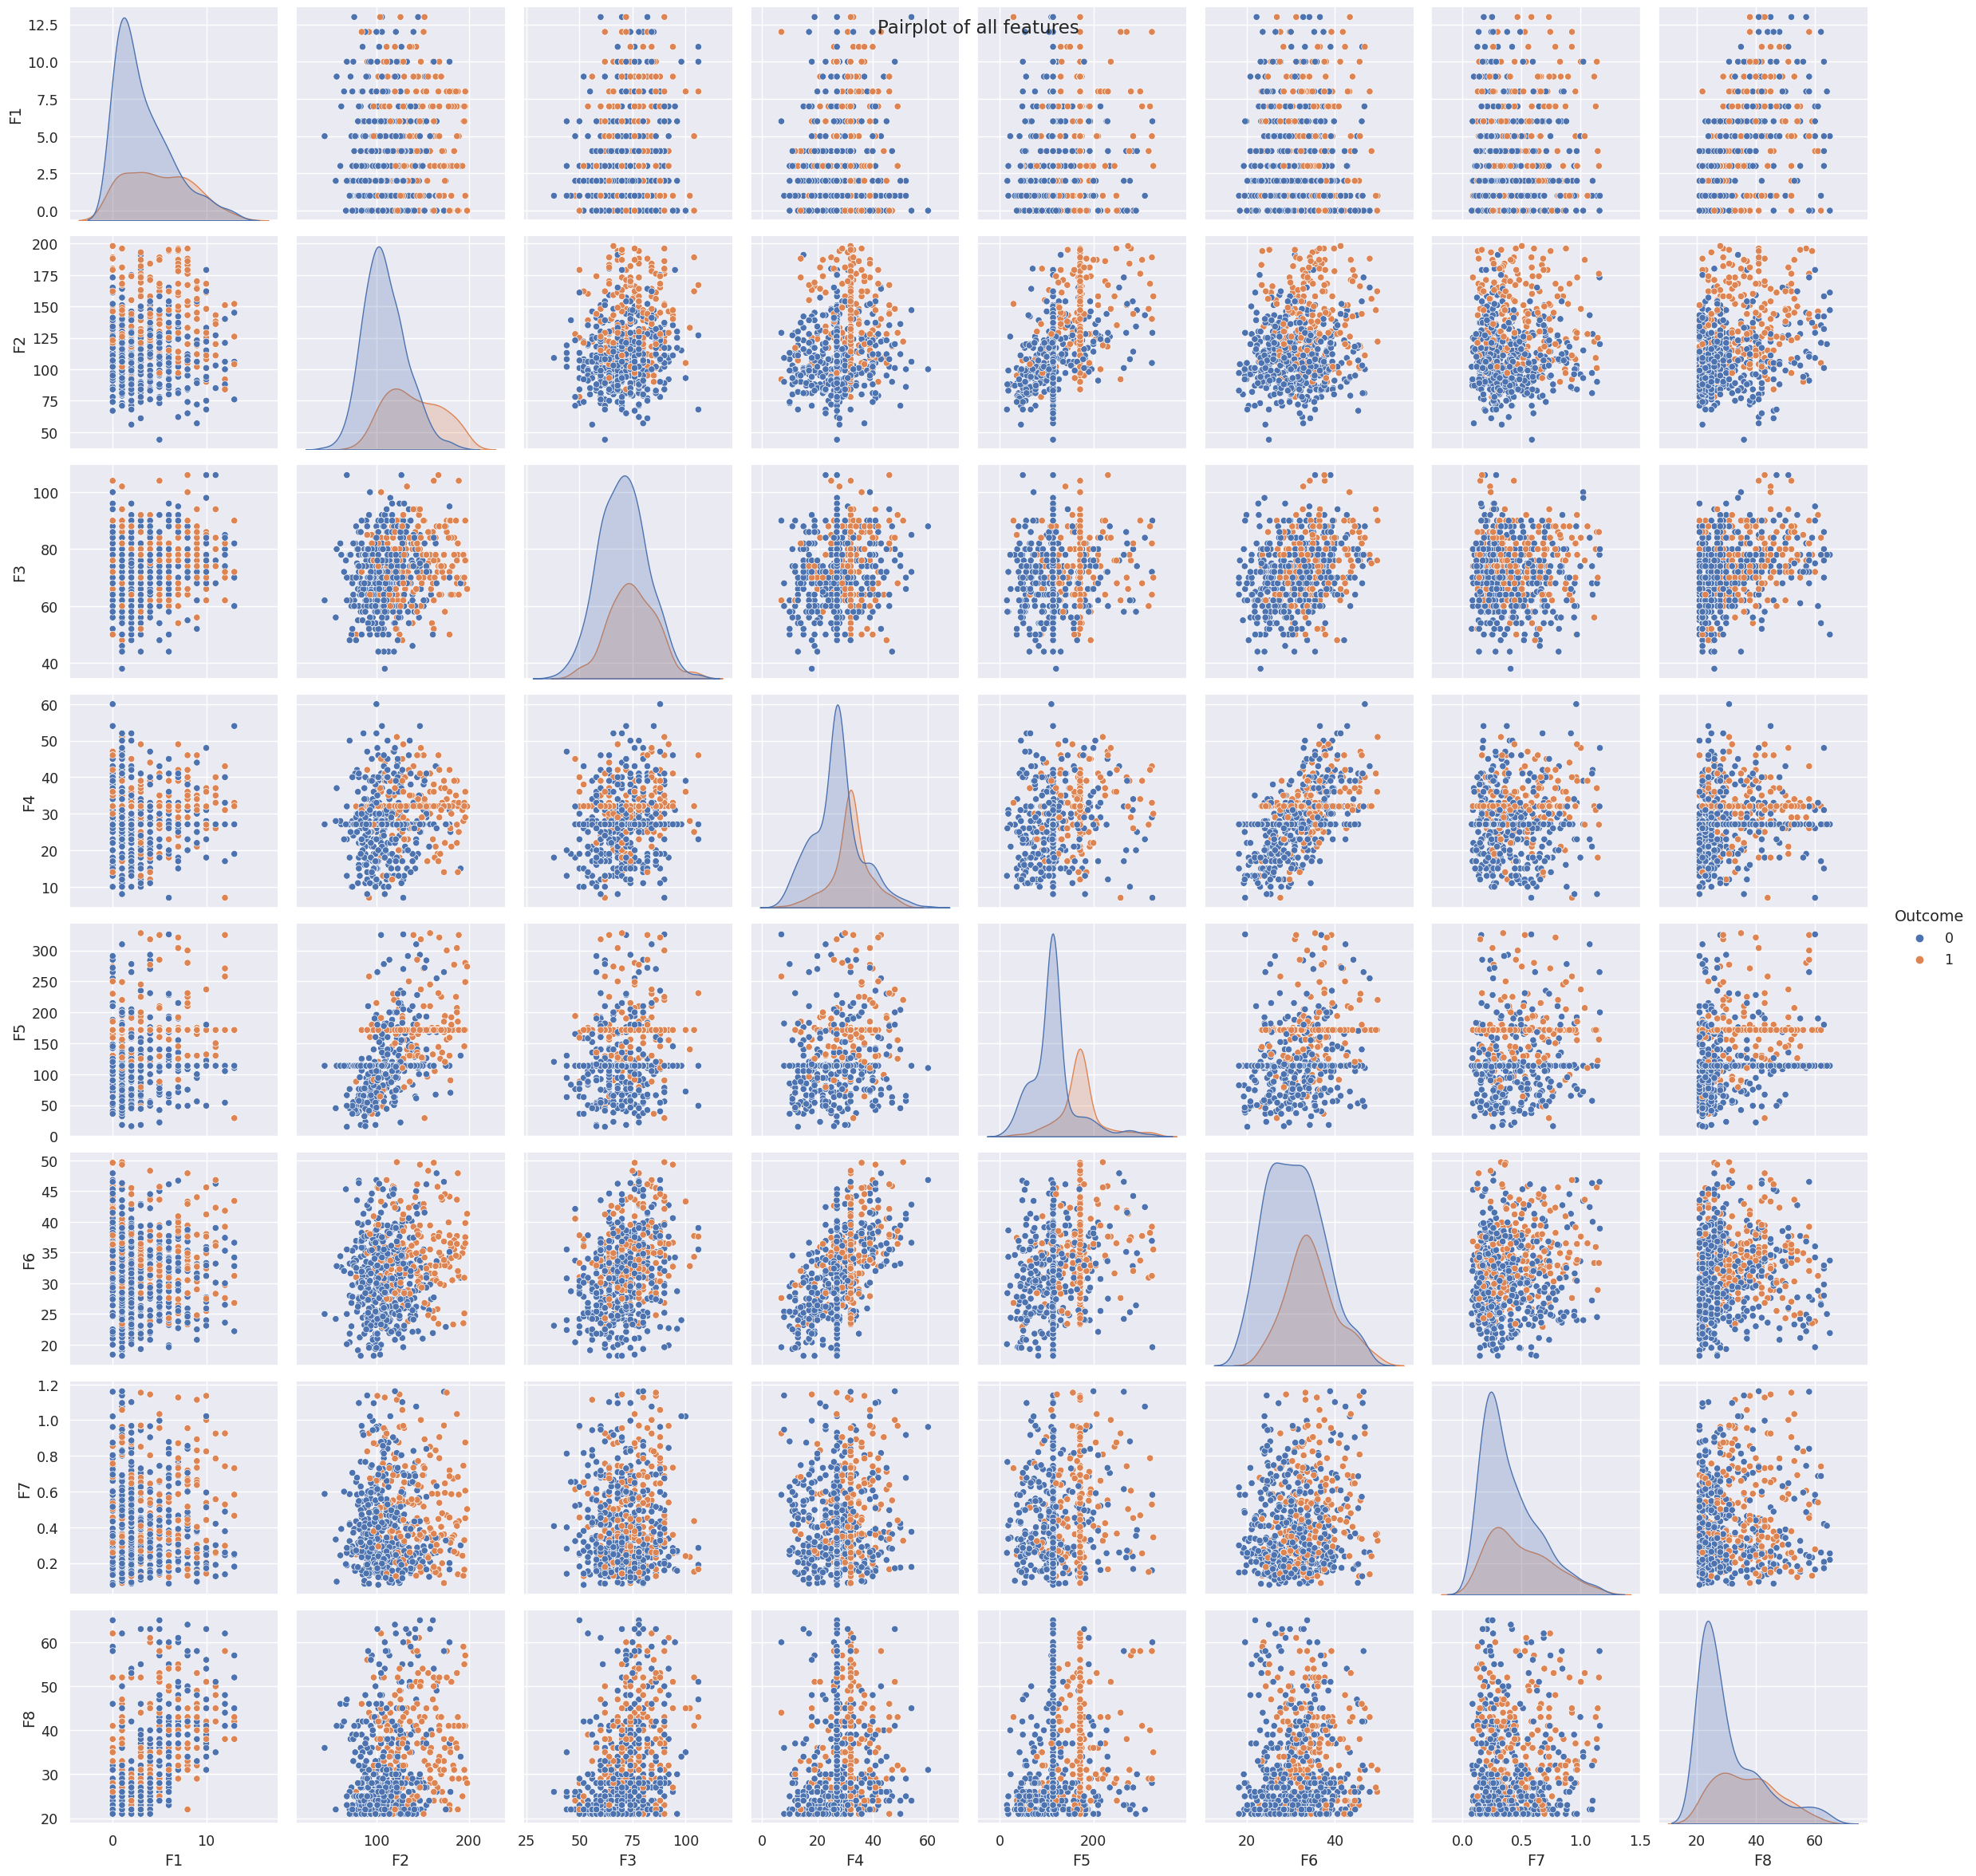

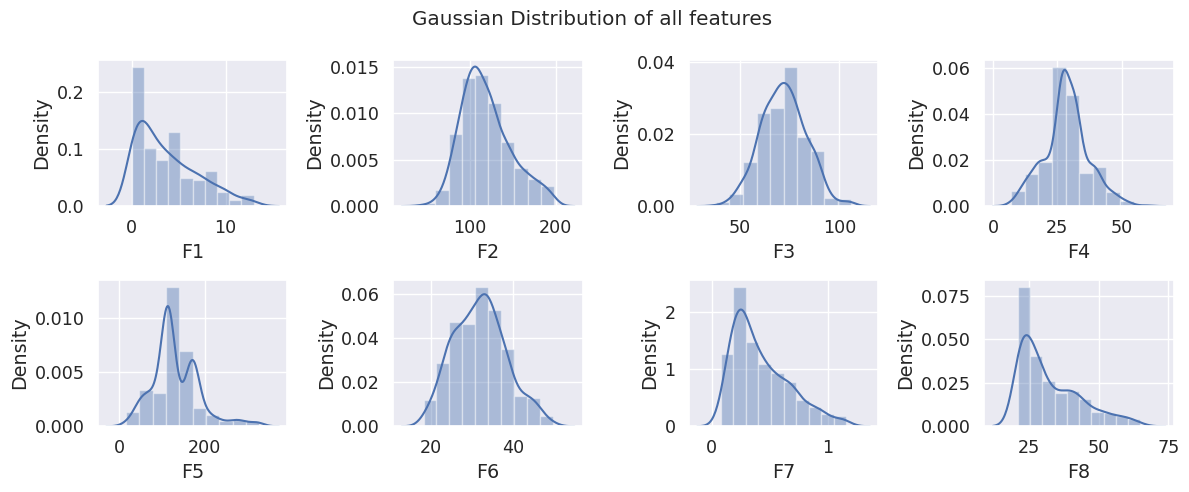

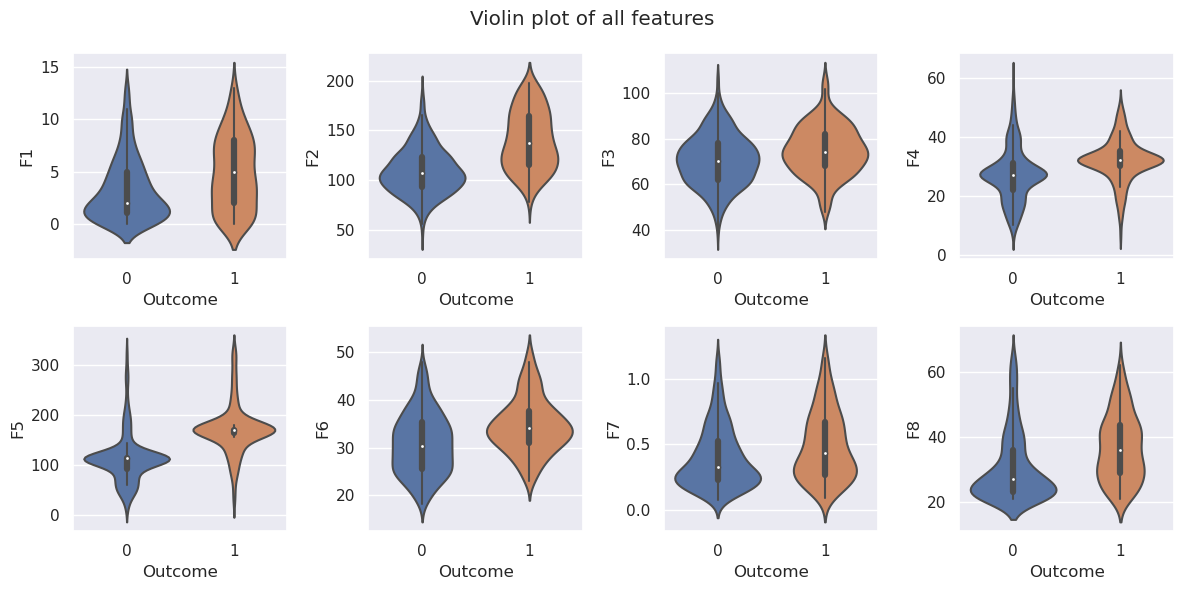

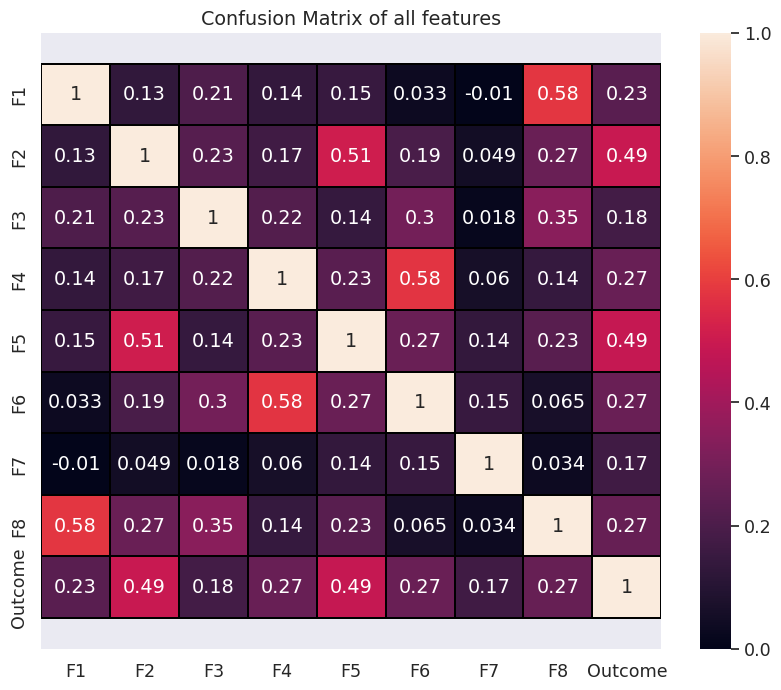

In [15]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

++++++++++++++++++++++++++++++++++++++++++++++++++
model running with ensembling  ---  2  models
++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.89      0.93      0.91        27

    accuracy                           0.95        93
   macro avg       0.93      0.94      0.94        93
weighted avg       0.95      0.95      0.95        93


Area Under ROC (AUC): 0.9820426487093153

Confusion Matrix for current fold: 
[[63  3]
 [ 2 25]]

Accuracy for Current Fold: 0.946236559139785

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        66
           1       0.80      0.74      0.77        27

    accuracy  

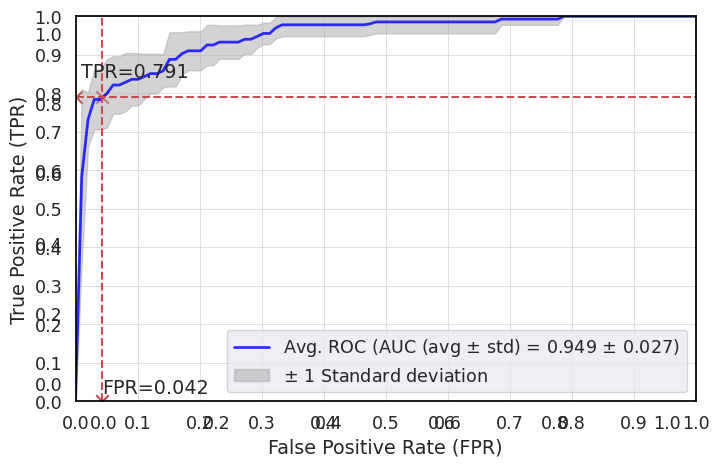


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.949 +/- 0.027
Accuracy (Avg. +/- Std.) is  0.910 +/- 0.028
Avg. CM is [[21, 2], [5, 63]]
Total for all folds CM is [[106, 14], [28, 316]]
Sensitivity (Avg. +/- Std.) is  0.791 +/- 0.089
Specificity (Avg. +/- Std.) is  0.958 +/- 0.020
Precision (Avg. +/- Std.) is  0.886 +/- 0.050
FOR (Avg. +/- Std.) is  0.080 +/- 0.032
DOR (Avg. +/- Std.) is  135.371 +/- 79.715
++++++++++++++++++++++++++++++++++++++++++++++++++
model running with ensembling  ---  3  models
++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        66
           1       0.83      0.89      0.86        27

    accuracy                           0.91        93
   macro avg       0.89      0.91      0.90        93
weighted avg       0.92      0.91      

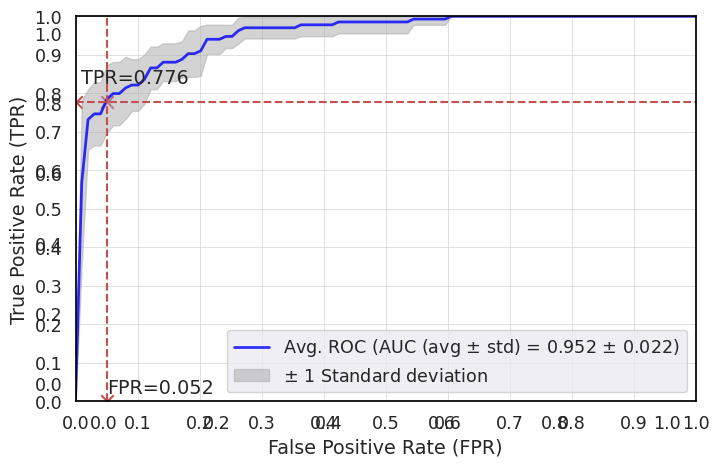


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.952 +/- 0.022
Accuracy (Avg. +/- Std.) is  0.899 +/- 0.016
Avg. CM is [[20, 3], [6, 62]]
Total for all folds CM is [[104, 17], [30, 313]]
Sensitivity (Avg. +/- Std.) is  0.776 +/- 0.074
Specificity (Avg. +/- Std.) is  0.948 +/- 0.037
Precision (Avg. +/- Std.) is  0.873 +/- 0.081
FOR (Avg. +/- Std.) is  0.086 +/- 0.024
DOR (Avg. +/- Std.) is  inf +/- nan
++++++++++++++++++++++++++++++++++++++++++++++++++
model running with ensembling  ---  4  models
++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.89      0.89      0.89        27

    accuracy                           0.94        93
   macro avg       0.92      0.92      0.92        93
weighted avg       0.94      0.94      0.94   

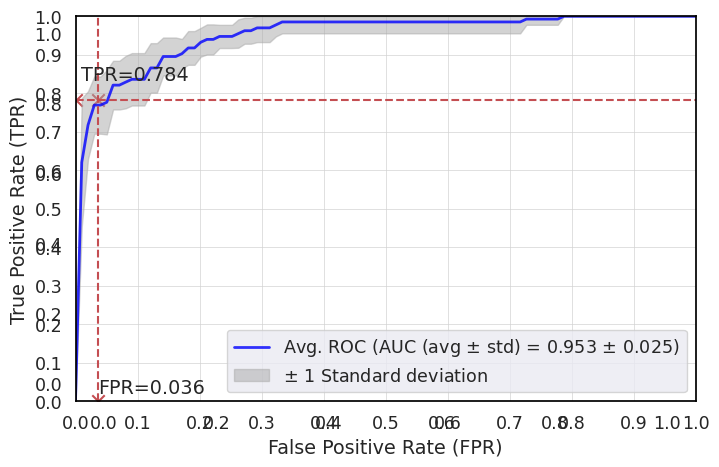


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.953 +/- 0.025
Accuracy (Avg. +/- Std.) is  0.912 +/- 0.016
Avg. CM is [[21, 2], [5, 63]]
Total for all folds CM is [[105, 12], [29, 318]]
Sensitivity (Avg. +/- Std.) is  0.784 +/- 0.078
Specificity (Avg. +/- Std.) is  0.964 +/- 0.021
Precision (Avg. +/- Std.) is  0.904 +/- 0.053
FOR (Avg. +/- Std.) is  0.082 +/- 0.027
DOR (Avg. +/- Std.) is  inf +/- nan
++++++++++++++++++++++++++++++++++++++++++++++++++
model running with ensembling  ---  5  models
++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.80      0.89      0.84        27

    accuracy                           0.90        93
   macro avg       0.88      0.90      0.89        93
weighted avg       0.91      0.90      0.90   

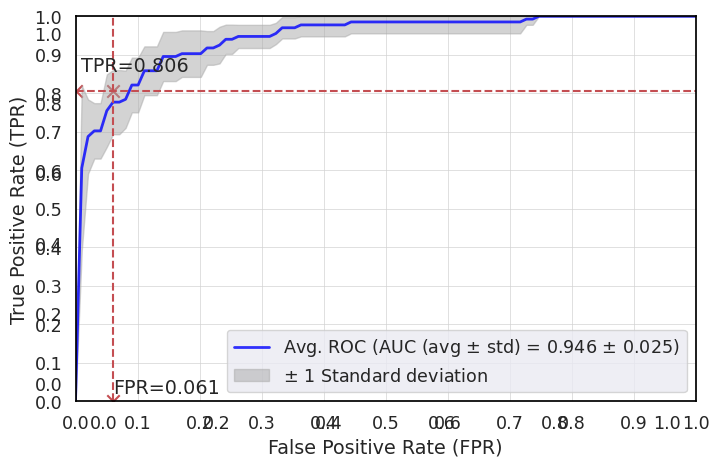


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.946 +/- 0.025
Accuracy (Avg. +/- Std.) is  0.901 +/- 0.018
Avg. CM is [[21, 4], [5, 62]]
Total for all folds CM is [[108, 20], [26, 310]]
Sensitivity (Avg. +/- Std.) is  0.806 +/- 0.075
Specificity (Avg. +/- Std.) is  0.939 +/- 0.033
Precision (Avg. +/- Std.) is  0.853 +/- 0.066
FOR (Avg. +/- Std.) is  0.076 +/- 0.025
DOR (Avg. +/- Std.) is  90.997 +/- 32.097
++++++++++++++++++++++++++++++++++++++++++++++++++
model running with ensembling  ---  6  models
++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.80      0.89      0.84        27

    accuracy                           0.90        93
   macro avg       0.88      0.90      0.89        93
weighted avg       0.91      0.90      0

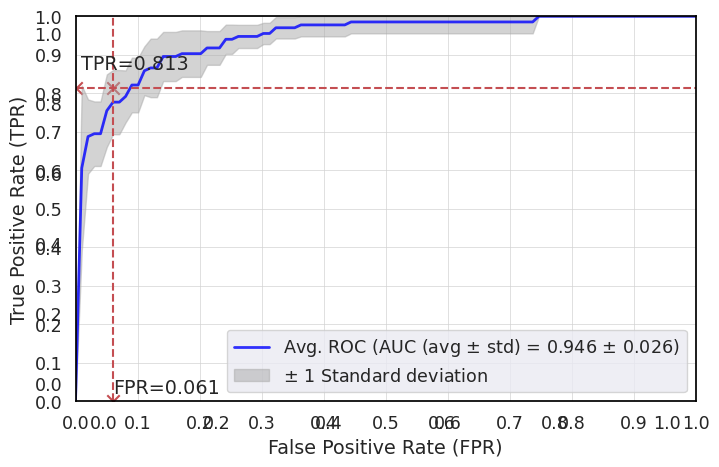


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.946 +/- 0.026
Accuracy (Avg. +/- Std.) is  0.903 +/- 0.020
Avg. CM is [[21, 4], [5, 62]]
Total for all folds CM is [[109, 20], [25, 310]]
Sensitivity (Avg. +/- Std.) is  0.814 +/- 0.077
Specificity (Avg. +/- Std.) is  0.939 +/- 0.033
Precision (Avg. +/- Std.) is  0.854 +/- 0.067
FOR (Avg. +/- Std.) is  0.073 +/- 0.026
DOR (Avg. +/- Std.) is  96.667 +/- 34.274


In [52]:
## create a text file to store the result of 
##different ensembelling model 
file = open('final_ensemble_ouput.txt','w') 
file.write('\n') 
###########################



############################
# 
for i in range(2,7):
    Accuracy = []                                                                # for store the value of accuracy 
    FP = []                                                                      # for store False Positive 
    TN = []                                                                      # for True Negative
    FN = []                                                                      # for False Negative
    TP = []                                                                      # for True Positive
    tprs = []                                                                    # for true positive rates
    aucs_ens = []                                                                # for store the values of auc
    sn = []                                                                      # for sensitivity 
    sp = []                                                                      # for specificity
    pr = []                                                                      # for precision
    FOR = []                                                                     # for False omission rate 
    DOR = []                                                                     # for Diagnostic odds ratio (DOR)
    iterator=0
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(8, 5))
    
    ####################
    ##priniting solid line using + 
    plus_print=n_dots*'+'
    print(plus_print)
    print('model running with ensembling  ---  '+str(i )+'  models')
    print(plus_print)
    ####################

    
    for train_index, test_index in kf.split(X_Data,Y_Lavel):                    # split data in train,test
        #   print("TRAIN:", train_index, "TEST:", test_index)
        X_Train, X_Test = X_Data[train_index], X_Data[test_index]               # the train data and label
        Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]             # the  test data and label

    ###################################################################
        clf = Ensembler( i, X_Train, np.ravel(Y_Train), X_Test, np.ravel(Y_Test), 'None')           #create ensemble model passing arguments

        tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,           #evaluation parameters of ensembelled model 
                                                    y_pred = clf.predict(X_Test),
                                                    probas_ = clf.predict_proba(X_Test))
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs_ens.append(roc_auc)
        plot_Current_ROC (fpr,tpr,iterator,roc_auc)                             #plot the ROC curve of current fold
        iterator += 1
        TN.append(tn)
        FP.append(fp)
        FN.append(fn)
        TP.append(tp)
        Accuracy.append(accuracy_score(np.ravel(Y_Test), clf.predict(X_Test)))
        sn.append(tp/(tp+fn))
        sp.append(tn/(fp+tn))
        pr.append(tp/(tp+fp))
        FOR.append(fn/(tn+fn))
        DOR.append((tp*tn)/(fp*fn))
    
    average_ROC(mean_fpr,tprs,aucs_ens,TP,TN,FP,FN)                             #plot average ROC
    average_performance(aucs_ens,Accuracy,TP,TN,FP,FN)                          #print the average performance  
    file.write(str(i)+'---------------'+all_clf_res[i-2])
    file.write('\n') 
    file.write('\n') 
    print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
    print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
    print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
    print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
    print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))


file.close()

In [53]:
###### define the hyper parameters(number of neighbor,leaf_size,Distance) of KNN
n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
leaf_size = [5,10,15,20,25,30,35,40,45,50]
Distance = [1,2]
tuned_parameters_dt = {'criterion': ['gini','entropy'],          # define parameters of DecisionTree
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }
tuned_parameters_xb = {                                          # define parameters of XGBClassifier
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#define parameters with different algorithm
tuned_parameters_knn = [ {'n_neighbors': n_neighbors, 
                        'algorithm' : ['brute'],
                        'p':Distance},
                         
                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},
                          
                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]
clf_knn = creat_Model (classifier = KNeighborsClassifier(),       #create knn with utility function          
                      X_Train = X_Train,
                      Y_Train = np.ravel(Y_Train),
                      tuned_parameters = tuned_parameters_knn,
                      verbose=0)
clf_dt = creat_Model (classifier = DecisionTreeClassifier(random_state=random_initializer),
                      X_Train = X_Train,                             #create model with DecisionTree classifier with utility function 
                      Y_Train = np.ravel(Y_Train),
                      tuned_parameters = tuned_parameters_dt,
                      verbose=0)
clf_xb = creat_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'error',random_state=random_initializer),
                      X_Train = X_Train,                              #create model with XGB Classifier classifier with utility function
                      Y_Train = np.ravel(Y_Train),
                      tuned_parameters = tuned_parameters_xb,
                      verbose=0)
model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_knn.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test))])
model.fit(X_Train,Y_Train)

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           n_jobs=-1,
                                           param_grid=[{'algorithm': ['brute'],
                                                        'n_neighbors': [1, 3, 5,
                                                                        7, 9,
                                                                        11, 13,
                                                                        15, 17,
                                                                        19, 21,
                                                                        23, 25,
                                                                        27, 29,
                                                                        31, 33,
                                                                        35, 37,
                                                                        39, 41,
                                                                        43, 45,
                                                                        47,
                                                                        49],
                                                        'p': [1, 2]},
                                                       {'algorithm': ['ball_tree'],
                                                        'leaf_size': [5, 10, 15,
                                                                      20, 25,
                                                                      30, 35,
                                                                      40, 45,
                                                                      50],
                                                        'n_neighbors': [1, 3, 5,
                                                                        7, 9,
                                                                        11, 13,
                                                                        15, 17,
                                                                        19, 21,
                                                                        23, 25,
                                                                        27...
                                           scoring='roc_auc')),
                             ('dt',
                              GridSearchCV(cv=5,
                                           estimator=DecisionTreeClassifier(random_state=20),
                                           n_jobs=-1,
                                           param_grid={'criterion': ['gini',
                                                                     'entropy'],
                                                       'min_samples_leaf': [1,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5],
                                                       'min_samples_split': [0.1,
                                                                             0.2,
                                                                             0.3,
                                                                             0.4,
                                                                             0.5,
                                                                             0.6,
                                                                             0.7,
                                                                             0.8,
                                                               

In [18]:
model.predict(X_Train)

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [20]:
model.get_params(deep=True)

{'estimators': [('knn',
   GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                param_grid=[{'algorithm': ['brute'],
                             'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                             23, 25, 27, 29, 31, 33, 35, 37, 39,
                                             41, 43, 45, 47, 49],
                             'p': [1, 2]},
                            {'algorithm': ['ball_tree'],
                             'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                             'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                             23, 25, 27, 29, 31, 33, 35, 37, 39,
                                             41, 43, 45, 47, 49],
                             'p': [1, 2]},
                            {'algorithm': ['kd_tree'],
                             'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                             '

In [22]:
model.get_feature_names_out(input_features=None)

array(['votingclassifier_knn0', 'votingclassifier_knn1',
       'votingclassifier_xb0', 'votingclassifier_xb1',
       'votingclassifier_dt0', 'votingclassifier_dt1'], dtype=object)

In [43]:
data

F1     F2    F3         F4          F5    F6     F7    F8  Outcome
0    6.0  148.0  72.0  35.000000  171.474227  33.6  0.627  50.0        1
1    1.0   85.0  66.0  29.000000  113.606695  26.6  0.351  31.0        0
2    8.0  183.0  64.0  32.059259  171.474227  23.3  0.672  32.0        1
3    1.0   89.0  66.0  23.000000   94.000000  28.1  0.167  21.0        0
5    5.0  116.0  74.0  27.094512  113.606695  25.6  0.201  30.0        0
..   ...    ...   ...        ...         ...   ...    ...   ...      ...
762  9.0   89.0  62.0  27.094512  113.606695  22.5  0.142  33.0        0
764  2.0  122.0  70.0  27.000000  113.606695  36.8  0.340  27.0        0
765  5.0  121.0  72.0  23.000000  112.000000  26.2  0.245  30.0        0
766  1.0  126.0  60.0  32.059259  171.474227  30.1  0.349  47.0        1
767  1.0   93.0  70.0  31.000000  113.606695  30.4  0.315  23.0        0

[530 rows x 9 columns]

In [47]:
X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']
print(y.head())

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Data)
standardised_data = scaler.transform(X_Data)
print(standardised_data)

X = standardised_data
y = data.Outcome
print(X)
print(y)

[[ 0.64112653  1.2880236   0.05532709 ...  0.3141861   1.02564868
   1.73849525]
 [-0.90343582 -1.20661006 -0.52156657 ... -0.870761   -0.21987009
  -0.11679759]
 [-0.90343582 -1.04822062 -0.52156657 ... -0.61684377 -1.05021593
  -1.0932675 ]
 ...
 [ 0.33221406  0.21889489  0.05532709 ... -0.93847227 -0.69822149
  -0.21444458]
 [-0.90343582  0.41688168 -1.09846022 ... -0.27828745 -0.22889558
   1.44555428]
 [-0.90343582 -0.88983118 -0.1369708  ... -0.22750401 -0.38232905
  -0.89797352]]
[[ 0.64112653  1.2880236   0.05532709 ...  0.3141861   1.02564868
   1.73849525]
 [-0.90343582 -1.20661006 -0.52156657 ... -0.870761   -0.21987009
  -0.11679759]
 [-0.90343582 -1.04822062 -0.52156657 ... -0.61684377 -1.05021593
  -1.0932675 ]
 ...
 [ 0.33221406  0.21889489  0.05532709 ... -0.93847227 -0.69822149
  -0.21444458]
 [-0.90343582  0.41688168 -1.09846022 ... -0.27828745 -0.22889558
   1.44555428]
 [-0.90343582 -0.88983118 -0.1369708  ... -0.22750401 -0.38232905
  -0.89797352]]
0      1
1      

In [57]:
"""Save the Model with the Highest Accuracy using pickle"""

import pickle
pickle.dump(model, open('model.pkl', 'wb')) #svm has the highest accuracy

pickle.dump(scaler, open('scaler.pkl', 'wb')) #save the std scaler too

In [55]:
X_Train

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       ...,
       [  2.   , 122.   ,  70.   , ...,  36.8  ,   0.34 ,  27.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [24]:
len(X_Train)

509

In [56]:
len(X_Train[0])

8

In [26]:
data

F1     F2    F3         F4          F5    F6     F7    F8  Outcome
0     6.0  148.0  72.0  35.000000  171.474227  33.6  0.627  50.0        1
1     1.0   85.0  66.0  29.000000  113.606695  26.6  0.351  31.0        0
2     8.0  183.0  64.0  32.059259  171.474227  23.3  0.672  32.0        1
3     1.0   89.0  66.0  23.000000   94.000000  28.1  0.167  21.0        0
5     5.0  116.0  74.0  27.094512  113.606695  25.6  0.201  30.0        0
..    ...    ...   ...        ...         ...   ...    ...   ...      ...
763  10.0  101.0  76.0  48.000000  180.000000  32.9  0.171  63.0        0
764   2.0  122.0  70.0  27.000000  113.606695  36.8  0.340  27.0        0
765   5.0  121.0  72.0  23.000000  112.000000  26.2  0.245  30.0        0
766   1.0  126.0  60.0  32.059259  171.474227  30.1  0.349  47.0        1
767   1.0   93.0  70.0  31.000000  113.606695  30.4  0.315  23.0        0

[636 rows x 9 columns]

In [27]:
len(X[0])

NameError: name 'X' is not defined

In [31]:
len(X_Data[0])

6

In [30]:
len(Y_Lavel[0])

1

In [74]:
input_features = [[1, 85, 66, 29, 114, 27, 0.351, 31]]
predict = model.predict(input_features)
print(predict)

[0]


In [61]:
Y_Train

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [67]:
type(X_Train)

numpy.ndarray

In [69]:
model.predict(X_Train)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [70]:
model.predict(scaler.transform(X_Train))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,